TUGAS DATA MINING B ( LAILATUL FIRTRIYAH 06211740000027 )(ELIZABETH GOKMAULI MARBUN 06211740000064)

In [17]:
import numpy as np
import pandas as pd

In [18]:
data=pd.read_csv('E:\datmin\paper1/data.csv',encoding="ISO-8859-1")
data

C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


dari hasil diatas menunjukkan bahwa ada data yang missing value sehingga harus diperbaiki agar analisis selanjutnya akan lebih  mudah.

In [20]:
data.spm = data['spm'].fillna(data['spm'].mean())
data.rspm = data['rspm'].fillna(data['rspm'].mean())
data.so2 = data['so2'].fillna(data['so2'].mean())
data.no2 = data['no2'].fillna(data['no2'].mean())
data.pm2_5 =data.pm2_5.isnull().sum()/len(data.sampling_date)*100
data.type=data['type'].fillna('Residential,Rural and other Areas')
#mengubah data missing value pada data numerik dengan rata-rata

In [21]:
#menghapus data yang Nan pada agency, stn code dan location monitoring station karena lokasi tidak bisa digantikan atau dirubah
df=data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264173 entries, 1036 to 435738
Data columns (total 13 columns):
stn_code                       264173 non-null object
sampling_date                  264173 non-null object
state                          264173 non-null object
location                       264173 non-null object
agency                         264173 non-null object
type                           264173 non-null object
so2                            264173 non-null float64
no2                            264173 non-null float64
rspm                           264173 non-null float64
spm                            264173 non-null float64
location_monitoring_station    264173 non-null object
pm2_5                          264173 non-null float64
date                           264173 non-null object
dtypes: float64(5), object(8)
memory usage: 28.2+ MB


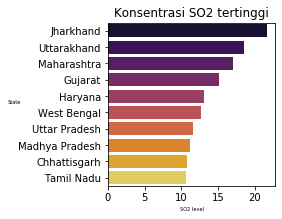

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (3,3))
no2_level  = df.groupby(['state']).mean()['so2'].sort_values(ascending = False).head(10).to_frame()
sns.barplot(x = 'so2', y = no2_level.index,data = no2_level,palette='inferno')
plt.title('Konsentrasi SO2 tertinggi')
plt.xlabel('SO2 level',fontsize = 5)
plt.ylabel('State',fontsize = 5,rotation = 'horizontal')
plt.show()

Konsentrasi pada SO2 yang tertinggi di Negara India  Menunjukkan bahwa wilayah daerah Jharkhand memiliki level konsentrasi SO2 sangat tinggi yaitu lebih dari 20, kemudian yang kedua yaitu wilayah Uttarakhand  dan ketiga yaitu Maharashtra masih berada diantara 15 hingga 20. 

Text(0, 0.5, 'State')

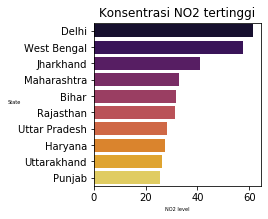

In [23]:
plt.figure(figsize = (3,3))
so2_level  = df.groupby(['state']).mean()['no2'].sort_values(ascending = False).head(10).to_frame()
sns.barplot(x = 'no2', y = so2_level.index,data = so2_level,palette='inferno')
plt.title('Konsentrasi NO2 tertinggi')
plt.xlabel('NO2 level',fontsize = 5)
plt.ylabel('State',fontsize = 5,rotation = 'horizontal')

menujukkan bahwa konsentrasi NO2 tinggi hingga mencapai 60 yaitu pada wilayah Delhi yang merupakan Ibu Kota Negara India. Wilayah kedua yang konsentrasinya tinggi yaitu West Bengal yang memiliki selisih sedikit dengan wilayah Delhi. Berbeda cukup besar dengan wilayah yang ketiga yaitu Jharkhand yang konsentrasi  NO2 mencapai lebih dari 40. 

Text(0, 0.5, 'State')

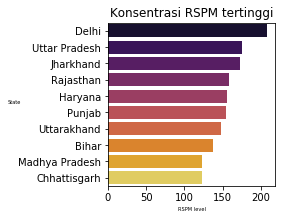

In [24]:
plt.figure(figsize = (3,3))
rspm_level  = df.groupby(['state']).mean()['rspm'].sort_values(ascending = False).head(10).to_frame()
sns.barplot(x ='rspm', y = rspm_level.index,data = rspm_level,palette='inferno')
plt.title('Konsentrasi RSPM tertinggi')
plt.xlabel('RSPM level',fontsize = 5)
plt.ylabel('State',fontsize = 5,rotation = 'horizontal')

RSPM menunjukkan wilayah konsentrasi yang tinggi yaitu mencapai 200 yaitu Delhi. Urutan kedua yaitu ada di wilayah Uttar Pradesh dan ketiga berada di Jharkhand. Perbedaan konsentrasi Delhi dan Uttar Pradesh lebih besar dibandingkan dengan Jharkhand dan Uttar Pradesh. 

Text(0, 0.5, 'State')

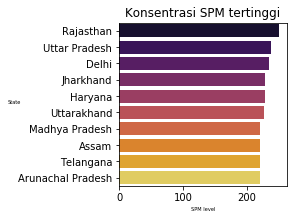

In [25]:
plt.figure(figsize = (3,3))
spm_level  = df.groupby(['state']).mean()['spm'].sort_values(ascending = False).head(10).to_frame()
sns.barplot(x = 'spm', y = spm_level.index,data = spm_level,palette='inferno')
plt.title('Konsentrasi SPM tertinggi')
plt.xlabel('SPM level',fontsize = 5)
plt.ylabel('State',fontsize = 5,rotation = 'horizontal')

Konsentrasi untuk SPM terlihat jika selisih antar wilayah tidak terlalu besar namun level konsentrasinya lebih tinggi dibandingkan dengan RSPM. Wilayah yang memiliki konsentrasi SPM tertinggi yaitu Rajasthan, lalu Uttar Pradesh dan Delhi. Ketiga wilayah ini dari 10 wilayah yang memiliki konsentrasi SPM tertinggi memiliki konsentrasi lebih dari 200.

Text(0, 0.5, 'State')

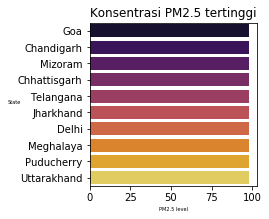

In [26]:
plt.figure(figsize = (3,3))
pm_level  = df.groupby(['state']).mean()['pm2_5'].sort_values(ascending = False).head(10).to_frame()
sns.barplot(x = 'pm2_5', y = pm_level.index,data = pm_level,palette='inferno')
plt.title('Konsentrasi PM2.5 tertinggi')
plt.xlabel('PM2.5 level',fontsize = 5)
plt.ylabel('State',fontsize = 5,rotation = 'horizontal')

Level konsentrasi PM2.5 berbeda sangat kecil dan mencapai 100. Wilayah Goa, Chandigarm, dan Mizoram tidak memiliki perbedaan yang signifikan. Cenderung memiliki konsentrasi yang sama dengan tujuh wilayah yang lain. Variansi tiap wilayah juga akan kecil karena perbedaan yang kecil.

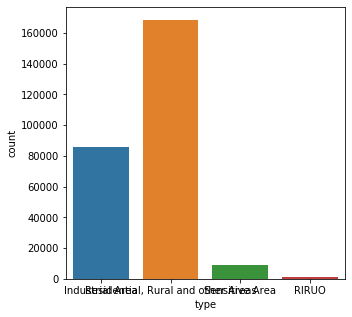

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(df['type'])

Tempat pengukuran jumlahnya ada 10 kategori namun hanya ada 4 kategori yang terbanyak yaitu Industrial Area, Residential, Rural and other Areas, Sensitive Area, dan RIRUO. Jumlah terbanyak yaitu pada Residential, Rural and other Areas yang jumlah pengukuran sudah lebih dari 160,000 kali dan yang kedua yaitu Industrial Area sebagai tempat pengukuran lebih dari 8,000 kali.

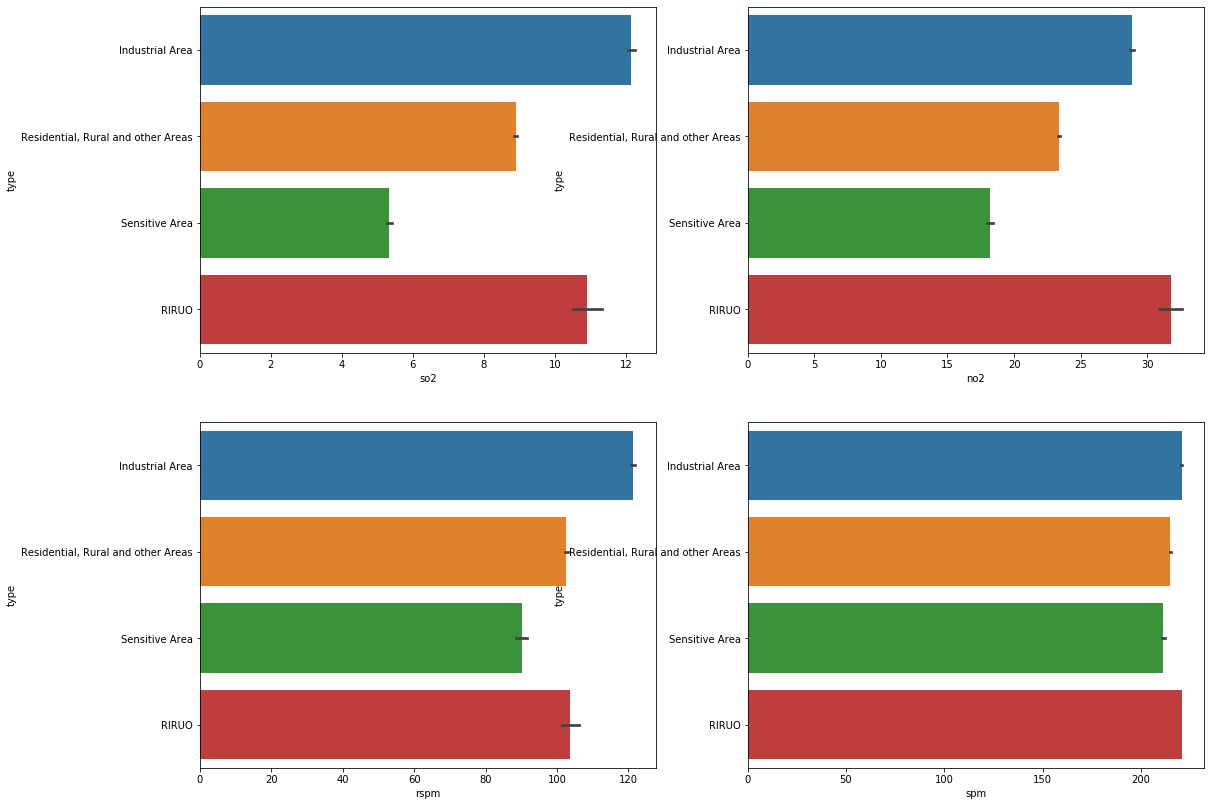

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.barplot("so2", y="type",
                 data=df,
                 ax=axes[0,0]
                )
ax = sns.barplot("no2", y="type",
                 data=df,
                 ax=axes[0,1]
                )
ax = sns.barplot("rspm", y="type",
                 data=df,
                 ax=axes[1,0]
                )
ax = sns.barplot("spm", y="type",
                 data=df,
                 ax=axes[1,1]
                )

Setiap SO2, NO2, RSPM, dan SPM berdasarkan tempat pengukuran menunjukkan bahwa RIRUO sering digunakan untuk mengukur. Tempat pengukuran yang sering digunakan selain RIRUO yaitu Industrial Area karena tempat yang sering menimbulkan polusi udara dari gas-gas yang dibuang oleh pabrik atau yang lain. Pada pengukuran untuk SPM menunjukkan bahwa empat kategori tempat tersebut juga sering digunakan untuk mengukur SPM.

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


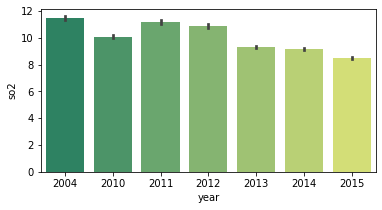

In [29]:
import datetime as datetime
df['year'] = pd.DatetimeIndex(df['date']).year
df.year = df.year.astype(int)
plt.figure(figsize= (6,3))
sns.barplot(x = df['year'],y = df['so2'],data = df,palette = 'summer')

Setiap tahunnya terlihat bahwa semakin lama rata-rata SO2 di Negara India semakin berkurang. Hal itu menunjukkan pemerintah dan rakyat di Negara India sudah memahami jika polusi udara di negaranya sudah tinggi sehingga melakukan berbagai cara agar bisa menurunkan polusi udara

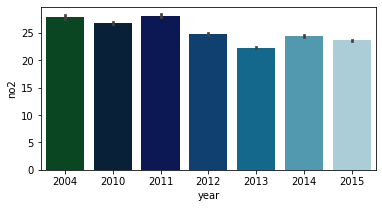

In [30]:
plt.figure(figsize= (6,3))
sns.barplot(x = df['year'],y = df['no2'],data = df,palette = 'ocean')

Rata-rata pada NO2 juga terlihat berbanding lurus dengan SO2 yang semakin lama juga turun. Tetapi tidak konsisten turun, pada tahun keberapa NO2 akan kembali naik namun tidak setinggi beberapa tahun yang lalu.

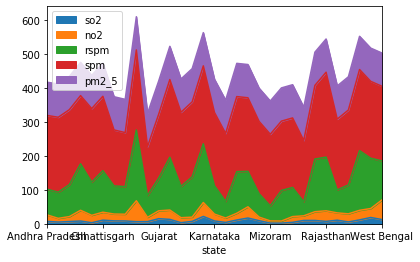

In [31]:
statewise_emmissions = df.groupby('state').mean()[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]
statewise_emmissions.plot.area()

Grafik menunjukkan bahwa level konsentrasi untuk polusi udara yang tertinggi adalah SPM dengan selisih yang cukup besar dibandingkan dengan yang lain. Polusi ini diberbagai wilayah juga sama yaitu memiliki selisih yang besar. RSPM merupakan kedua terbesar dari polusi udara yang ada di Negara India. Kedua jenis polusi ini sesungguhnya sangat berbahaya untuk kesehatan jika terlalu tinggi.

In [32]:
df.describe()

,so2,no2,rspm,spm,pm2_5,year
count,264173.000000,264173.000000,264173.000000,264173.000000,2.641730e+05,264173.000000
mean,9.843489,25.011172,108.189266,216.728963,9.786250e+01,2012.184148
std,10.637613,18.377857,73.609672,63.028473,2.854540e-10,2.664662
min,0.000000,0.000000,0.000000,0.000000,9.786250e+01,2004.000000
25%,4.000000,13.920000,57.000000,220.783480,9.786250e+01,2011.000000
50%,7.400000,21.000000,91.000000,220.783480,9.786250e+01,2013.000000
75%,12.400000,31.000000,140.000000,220.783480,9.786250e+01,2014.000000
max,909.000000,876.000000,6307.033333,2610.000000,9.786250e+01,2015.000000


SO2 memiliki rata-rata sebesar 9.84 dengan minimal 0 dan maksimalnya 909 dan standar deviasi 10.64. Pada NO2 rata-ratanya yaitu 25.01 dengan minimal 0 dan maksimal sebesar 876 dan standar deviasi 18.38. RSPM dan SPM memiliki minimal yang sama yaitu nol dan standar deviasi yang besar yaitu masing-masing 73.61 dan 63.03 serta rata-rata sebesar 108.19 dan 216.73. PM2.5 penyebaran datanya yaitu 0.000 karena minimal dan maksimalnya tidak berbeda dan rata-ratanya juga memiliki nilai yang sama yaitu 97.9

In [33]:
df.groupby('so2').max()[['state','date']].tail(5)

,state,date
so2,,
482.0,West Bengal,2011-12-27
492.0,West Bengal,2011-11-01
498.0,West Bengal,2011-04-02
597.0,Maharashtra,2012-06-25
909.0,Tamil Nadu,2011-02-05


In [34]:
df.groupby('no2').max()[['state','date']].tail(5)

,state,date
no2,,
530.0,Jharkhand,2011-06-20
592.0,West Bengal,2012-11-04
640.0,Maharashtra,2012-01-13
696.0,Himachal Pradesh,2014-09-22
876.0,Rajasthan,2014-10-23


In [35]:
df.groupby('spm').max()[['state','date']].tail(5)

,state,date
spm,,
1953.0,Rajasthan,2010-05-27
2015.0,Rajasthan,2010-05-26
2106.0,Rajasthan,2010-05-13
2485.0,Rajasthan,2010-05-27
2610.0,Rajasthan,2004-04-29


In [36]:
df.groupby('rspm').max()[['state','date']].tail(5)

,state,date
rspm,,
1111.000000,Uttar Pradesh,2012-02-27
1156.000000,Rajasthan,2011-03-16
1183.500000,Tamil Nadu,2010-05-13
1288.000000,Rajasthan,2011-03-19
6307.033333,Uttar Pradesh,2010-07-14


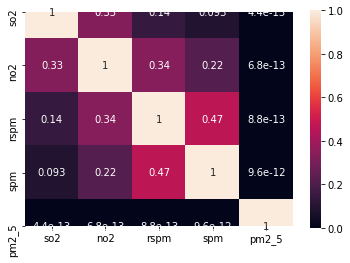

In [37]:
korelasi=data.corr()
sns.heatmap(korelasi.abs(),annot=True, square=True)

korelasinya terlihat rendah bahkan ada yang mendekati nol. 

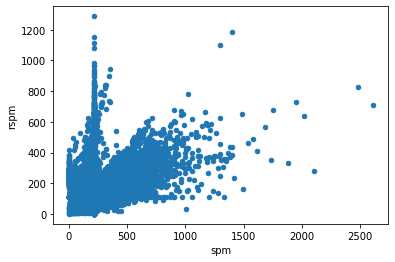

In [38]:
df=df[df['rspm']<6000]
df.plot(x='spm', y='rspm', kind='scatter')

In [39]:
import statsmodels.formula.api as smf
reg=smf.ols(formula='rspm~spm',data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rspm   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                 2.384e+04
Date:                Mon, 02 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:54:21   Log-Likelihood:            -1.4955e+06
No. Observations:              264172   AIC:                         2.991e+06
Df Residuals:                  264170   BIC:                         2.991e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3208      0.485     74.959      0.000      35.371      37.270
spm            0.3315      0.002    154.416      0.000       0.327       0.336
==============================================================================
Omnibus:                   112773.946   Durbin-Watson:                   0.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           821429.692
Skew:                           1.901   Prob(JB):                         0.00
Kurtosis:                      10.757   Cond. No.                         808.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

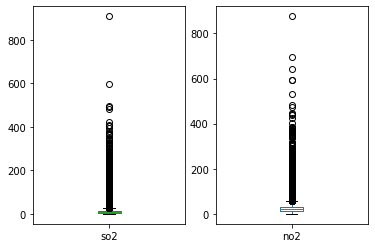

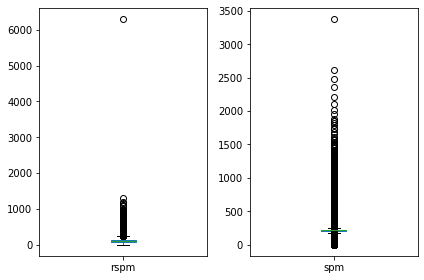

In [40]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig,(ax3,ax4)=plt.subplots(ncols=2)
data['so2'].plot.box(ax=ax1)
data['no2'].plot.box(ax=ax2)
data['rspm'].plot.box(ax=ax3)
data['spm'].plot.box(ax=ax4)
fig.tight_layout()

Untuk mendeteksi outlier bisa menggunakan boxplot, pada empat variabel yang bertipe numerik menghasilkan gambar boxplotnya teridentifikasi ada outlier. Outlier yang paling jelas terlihat yaitu pada variabel orders received. 

type
Industrial Area                        85465
RIRUO                                   1304
Residential, Rural and other Areas    168424
Sensitive Area                          8979
dtype: int64


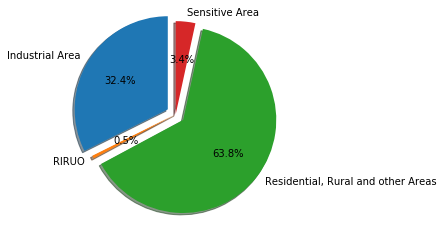

In [41]:
print(df.groupby('type').size())

labels = 'Industrial Area', 'RIRUO','Residential, Rural and other Areas','Sensitive Area'
sizes = [85465,1304,168424,8979]
explode = (0.1,0,0.1,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

Pie chart menunjukkan bahwa persentase yang paling besar yaitu residential rural and other areas, dan yang kedua yaitu industrial area. sisanya sensitif area dan RIRUO

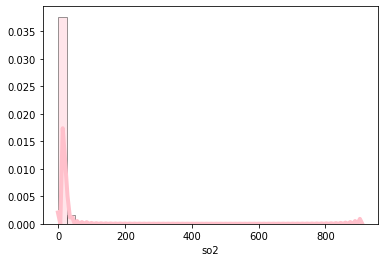

In [42]:
sns.distplot(df['so2'],hist=True,kde=True,bins=int(180/5),color='pink',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})

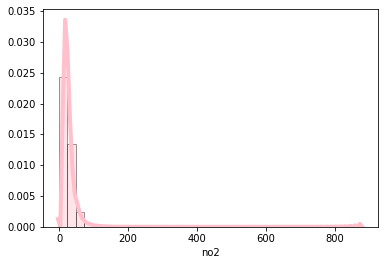

In [43]:
sns.distplot(df['no2'],hist=True,kde=True,bins=int(180/5),color='pink',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})

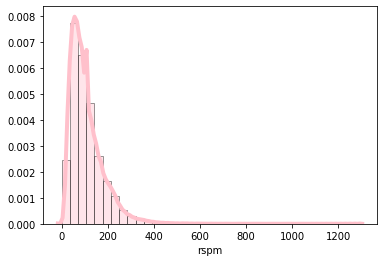

In [44]:
sns.distplot(df['rspm'],hist=True,kde=True,bins=int(180/5),color='pink',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})


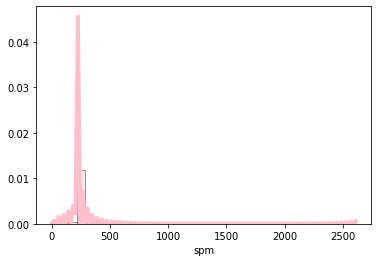

In [45]:
sns.distplot(df['spm'],hist=True,kde=True,bins=int(180/5),color='pink',hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})

Keempat variabel SO2, NO2, RSPM, dan SPM menunjukkan bahwa data tidak berdistribusi normal dan menunjukkan skewness kanan